In [1]:
# Step 1: Import necessary libraries
import numpy as np
import os
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import requests
from zipfile import ZipFile
from io import BytesIO
from PIL import Image
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import InceptionV3

In [2]:
# Define the URL of the dataset
url = 'https://github.com/SriPenumatcha/Flower-Identification-using-deep-learning/archive/refs/heads/main.zip'

# Download the dataset
response = requests.get(url)
if response.status_code == 200:
    # Extract the dataset
    with ZipFile(BytesIO(response.content)) as zip_file:
        zip_file.extractall('/tmp')

# Path to the extracted dataset
data_dir = '/tmp/Flower-Identification-using-deep-learning-main/CleanedDataSet'

In [3]:
#Use the Dataset API with the image_dataset_from_directory pipieline. This reduces computational load, sorts images by class and many other standard steps before image processing
data = tf.keras.utils.image_dataset_from_directory('/tmp/Flower-Identification-using-deep-learning-main/CleanedDataSet')

Found 4290 files belonging to 5 classes.


In [4]:
class_names = data.class_names
print(class_names)

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


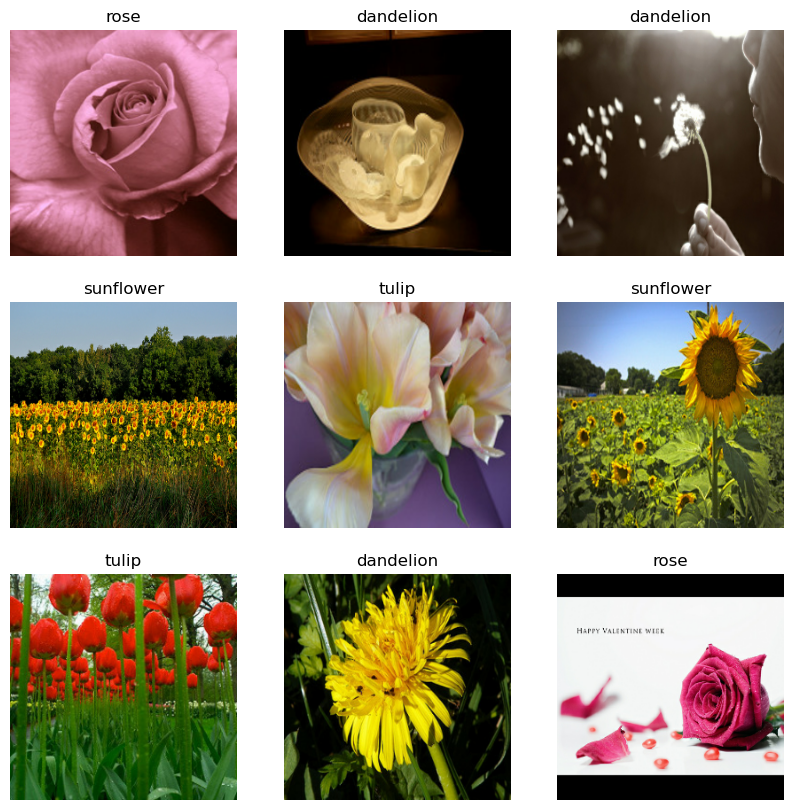

In [5]:
plt.figure(figsize=(10, 10))
for images, labels in data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [6]:
# Verify paths and dataset structure
folders = os.listdir(data_dir)
print("Folders:", folders)

Folders: ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


In [7]:
# Step 3: Load and prepare the dataset
data = load_files(data_dir)
X = np.array(data['filenames'])
y = np.array(data['target'])

In [8]:
# Function to convert images to arrays
def convert_img_to_arr(file_path_list):
    arr = []
    img_width, img_height = 150, 150
    for file_path in file_path_list:
        img = load_img(file_path, target_size=(img_width, img_height))
        img = img_to_array(img)
        arr.append(img)
    return arr

In [9]:
# Convert images to arrays
X = np.array(convert_img_to_arr(X))
print(X.shape)
print('First training item:', X[0])

(4290, 150, 150, 3)
First training item: [[[  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  ...
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]

 [[  0.   0.   0.]
  [  0.   0.   0.]
  [  1.   1.   3.]
  ...
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]

 [[  0.   0.   0.]
  [  1.   1.   1.]
  [  1.   1.   0.]
  ...
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]

 ...

 [[ 68. 111.  40.]
  [ 38.  92.  34.]
  [ 10.  33.   4.]
  ...
  [ 75.  92.  37.]
  [ 32.  48.   9.]
  [ 12.  27.   6.]]

 [[ 44. 105.  35.]
  [ 17.  56.  11.]
  [  9.  32.  16.]
  ...
  [ 21.  34.   8.]
  [ 62.  86.  28.]
  [ 35.  45.  20.]]

 [[ 29.  84.  19.]
  [  4.  20.   9.]
  [ 54.  94.  44.]
  ...
  [ 19.  36.   2.]
  [ 65.  84.  28.]
  [ 27.  46.  16.]]]


In [10]:
# Create an ImageDataGenerator with rescaling and validation split
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

In [11]:
# Prepare training and validation generators
train_generator = datagen.flow_from_directory(data_dir, target_size=(224, 224), batch_size=32, class_mode='categorical', subset='training')
validation_generator = datagen.flow_from_directory(data_dir, target_size=(224, 224), batch_size=32, class_mode='categorical', subset='validation')

Found 3433 images belonging to 5 classes.
Found 857 images belonging to 5 classes.


In [12]:
# Define a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(folders), activation='softmax')
])

In [13]:
# Print model layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [14]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
# Train the model
model.fit(train_generator, epochs=5, validation_data=validation_generator)


Epoch 1/5
108/108 [==============================] - 469s 4s/step - loss: 1.3774 - accuracy: 0.4195 - val_loss: 1.1280 - val_accuracy: 0.5181
Epoch 2/5
108/108 [==============================] - 464s 4s/step - loss: 1.0379 - accuracy: 0.5852 - val_loss: 1.0048 - val_accuracy: 0.6231
Epoch 3/5
108/108 [==============================] - 464s 4s/step - loss: 0.8489 - accuracy: 0.6790 - val_loss: 0.9184 - val_accuracy: 0.6348
Epoch 4/5
108/108 [==============================] - 464s 4s/step - loss: 0.6048 - accuracy: 0.7760 - val_loss: 0.9886 - val_accuracy: 0.6453
Epoch 5/5
108/108 [==============================] - 466s 4s/step - loss: 0.4086 - accuracy: 0.8447 - val_loss: 1.1557 - val_accuracy: 0.6359


In [16]:
# Evaluate the model
test_loss, test_acc = model.evaluate(validation_generator)
print(f'Test accuracy: {test_acc}')

27/27 [==============================] - 27s 994ms/step - loss: 1.1557 - accuracy: 0.6359
Test accuracy: 0.6359393000602722


In [17]:
# Use a pretrained VGG16 model
datagen = ImageDataGenerator(
    rescale=1/255, 
    validation_split=0.2,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

In [18]:
# Prepare training and validation generators
train_generator = datagen.flow_from_directory(data_dir, target_size=(224, 224), batch_size=8, class_mode='categorical', subset='training')
validation_generator = datagen.flow_from_directory(data_dir, target_size=(224, 224), batch_size=8, class_mode='categorical', subset='validation')

model_vgg16 = VGG16(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

model_vgg16.summary()

for layer in model_vgg16.layers:
    layer.trainable = False

model = Sequential()
model.add(model_vgg16)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(len(folders), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(train_generator, epochs=5, validation_data=validation_generator)

Found 3433 images belonging to 5 classes.
Found 857 images belonging to 5 classes.
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                            

In [19]:
# Evaluate the model
test_loss, test_acc = model.evaluate(validation_generator)
print(f'Test accuracy: {test_acc}')

108/108 [==============================] - 489s 5s/step - loss: 0.6197 - accuracy: 0.7865
Test accuracy: 0.7864643931388855


In [20]:
# Function to train a model
def train_model(new_model):
    # Freeze layers
    for layer in new_model.layers:
        layer.trainable = False

    model = Sequential()
    model.add(new_model)
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(len(folders), activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    model.fit(train_generator, epochs=5, validation_data=validation_generator)
    return model

new_model = InceptionV3(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
model = train_model(new_model)


Epoch 1/5
430/430 [==============================] - 725s 2s/step - loss: 3.7015 - accuracy: 0.7169 - val_loss: 1.0074 - val_accuracy: 0.7748
Epoch 2/5
430/430 [==============================] - 709s 2s/step - loss: 0.5397 - accuracy: 0.8375 - val_loss: 0.4863 - val_accuracy: 0.8250
Epoch 3/5
430/430 [==============================] - 709s 2s/step - loss: 0.3986 - accuracy: 0.8654 - val_loss: 0.5371 - val_accuracy: 0.8355
Epoch 4/5
430/430 [==============================] - 707s 2s/step - loss: 0.3586 - accuracy: 0.8803 - val_loss: 0.6335 - val_accuracy: 0.7946
Epoch 5/5
430/430 [==============================] - 708s 2s/step - loss: 0.3317 - accuracy: 0.8777 - val_loss: 0.5869 - val_accuracy: 0.8296


In [21]:
# Evaluate the model
test_loss, test_acc = model.evaluate(validation_generator)
print(f'Test accuracy: {test_acc}')

108/108 [==============================] - 134s 1s/step - loss: 0.5520 - accuracy: 0.8296
Test accuracy: 0.8296383023262024


In [22]:
# Export our model to HDF5 file
model.save("Flower-identification-optimised-model.h5")

In [23]:
# Function to load and preprocess the image
def load_and_preprocess_image(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img = img.resize((224, 224))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    return img_array

# URL of the image to predict
image_url = 'https://www.thetutuguru.com.au/wp-content/uploads/2020/07/Black-Madonna-Rose.jpg'

# Load and preprocess the image
img_array = load_and_preprocess_image(image_url)

# Predict the class of the image
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)

# Get the class label
class_labels = train_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
predicted_label = class_labels[predicted_class[0]]

print(f'The predicted class is: {predicted_label}')

1/1 [==============================] - 3s 3s/step
The predicted class is: rose


108/108 [==============================] - 98s 884ms/step


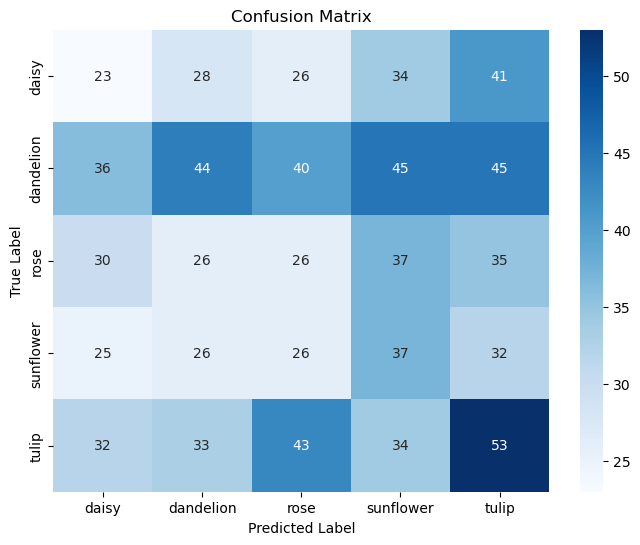

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get the true labels for the validation data
true_labels = validation_generator.classes

# Make predictions on the validation data
predictions = model.predict(validation_generator)
predicted_labels = np.argmax(predictions, axis=1)

# Create the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels.values(), yticklabels=class_labels.values())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [35]:
# Print out the true labels extracted from the validation generator
print("True Labels:")
for label in true_labels_list:
    print(label)

# Compare the true labels with the class labels dictionary
print("\nClass Labels Dictionary:")
for key, value in class_labels.items():
    print(f"Class Index: {key}, Class Label: {value}")

True Labels:
[0. 0. 0. 1. 0.]
[0. 1. 0. 0. 0.]
[0. 1. 0. 0. 0.]
[0. 1. 0. 0. 0.]
[0. 0. 0. 1. 0.]
[0. 0. 1. 0. 0.]
[0. 0. 1. 0. 0.]
[0. 0. 0. 1. 0.]

Class Labels Dictionary:
Class Index: 0, Class Label: daisy
Class Index: 1, Class Label: dandelion
Class Index: 2, Class Label: rose
Class Index: 3, Class Label: sunflower
Class Index: 4, Class Label: tulip


In [36]:
# Convert one-hot encoded true labels to single class indices
true_labels_indices = [np.argmax(label) for label in true_labels_list]

# Map the single class indices to their corresponding class labels
true_class_labels = [class_labels[index] for index in true_labels_indices]

# Print the true class labels
print("\nTrue Class Labels:")
for label in true_class_labels:
    print(label)


True Class Labels:
sunflower
dandelion
dandelion
dandelion
sunflower
rose
rose
sunflower


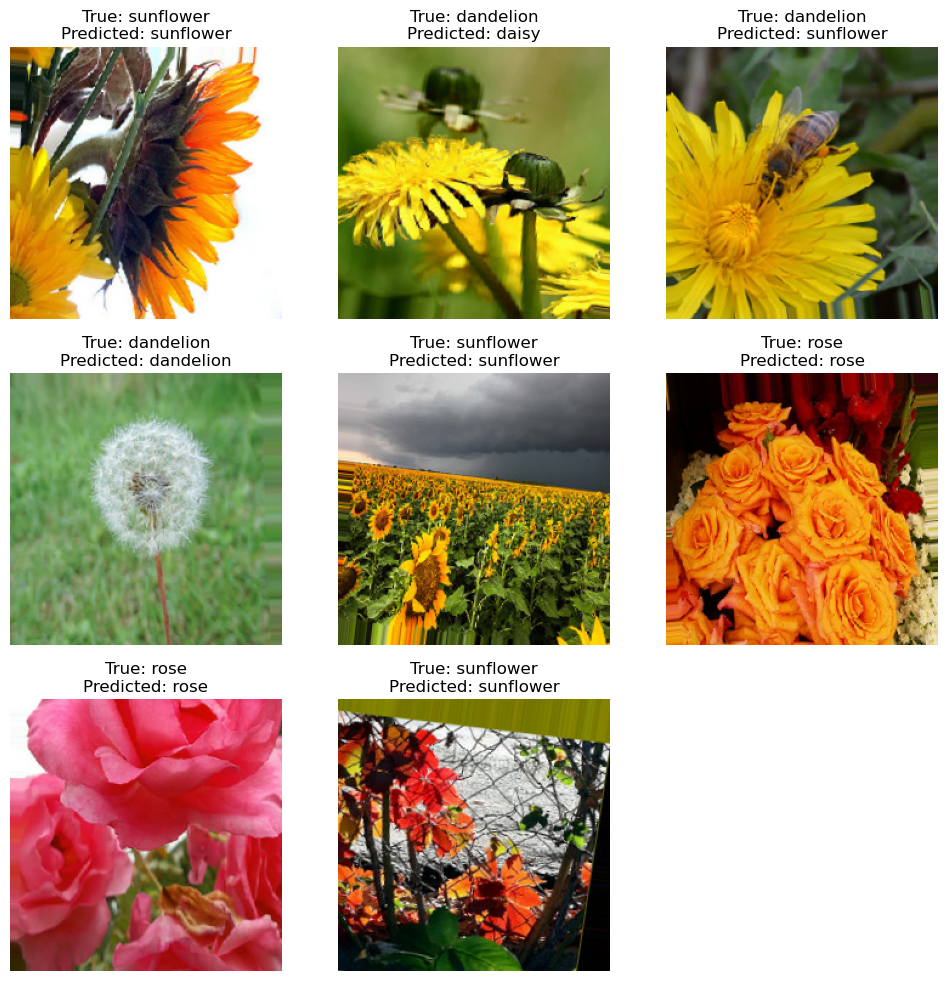

In [40]:
import matplotlib.pyplot as plt

# Determine the number of images to display based on the batch size
num_images = min(9, len(images))

# Display the images with their true and predicted labels
plt.figure(figsize=(12, 12))
for i in range(num_images):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    
    # Get the true label and corresponding class label
    true_label = true_class_labels[i]  # Use the true class labels obtained earlier
    predicted_label = class_labels[int(predicted_labels_list[i])]
    
    plt.title(f'True: {true_label}\nPredicted: {predicted_label}')
    plt.axis('off')
plt.show()